In [1]:
# Deep Learning with Python Ch2
# import neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


rank of tensor 3
dimension in each axis (60000, 28, 28)


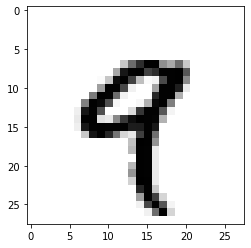

In [2]:
# load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('rank of tensor', train_images.ndim)
print('dimension in each axis', train_images.shape)

# show the 4th digit 
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [3]:
# preprocess data
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images  = test_images.reshape((10000, 28*28))
test_images  = test_images.astype('float32') / 255

print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

# convert class vectors to binary class matrices
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

60000 train samples
10000 test samples


In [5]:
# define network
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28*28,)))
network.add(Dense(10, activation='softmax'))

network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
# compile network
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [8]:
# train network using training data
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0282 - acc: 0.9918
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0224 - acc: 0.9933
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0166 - acc: 0.9951
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0133 - acc: 0.9961
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.0101 - acc: 0.9969


In [9]:
# apply network to test data
score = network.evaluate(test_images, test_labels)
print('test loss:', score[0])
print('test accuracy:', score[1])

10000/10000 [==============================] - 0s 46us/step
test loss: 0.0839496927191678
test accuracy: 0.9778
